In [0]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
G = nx.DiGraph()

In [0]:
G=nx.read_weighted_edgelist("/content/drive/My Drive/Colab Notebooks/week11_fish_trade_edges.txt",create_using=nx.MultiDiGraph())
#nx.add_edges(G.edges.data['weight'])
nx.info(G)

'Name: \nType: MultiDiGraph\nNumber of nodes: 151\nNumber of edges: 2744\nAverage in degree:  18.1722\nAverage out degree:  18.1722'

In [0]:
G1 = nx.read_weighted_edgelist("/content/drive/My Drive/Colab Notebooks/week11_fish_trade_edges2.txt",create_using=nx.MultiDiGraph())
#nx.add_edges(G.edges.data['weight'])
nx.info(G1)

'Name: \nType: MultiDiGraph\nNumber of nodes: 151\nNumber of edges: 2744\nAverage in degree:  18.1722\nAverage out degree:  18.1722'

In [0]:
print(G.size())
G.size(weight='weight')

2744


51074.39100000001

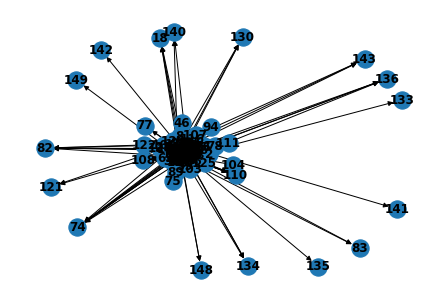

In [0]:
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, font_weight='bold',pos=pos)


Find size of SCC and percentage wrt number of nodes in entire network

In [0]:
scc = nx.number_strongly_connected_components(G)

In [0]:
percentage = scc/len(G)
print(percentage)

0.1456953642384106


Using Dijkstra algorithm to find paths from Germany to all other nodes

In [0]:
pathgermany = nx.single_source_dijkstra_path(G, '12')

In [0]:
pathgermany

{'1': ['12', '1'],
 '10': ['12', '43', '28', '10'],
 '100': ['12', '66', '100'],
 '101': ['12', '27', '48', '13', '101'],
 '102': ['12', '93', '15', '102'],
 '103': ['12', '27', '48', '40', '103'],
 '106': ['12', '93', '15', '38', '29', '106'],
 '107': ['12', '107'],
 '108': ['12', '64', '108'],
 '109': ['12', '27', '48', '40', '109'],
 '11': ['12', '1', '11'],
 '110': ['12', '27', '48', '13', '110'],
 '112': ['12', '93', '15', '38', '29', '112'],
 '113': ['12', '66', '113'],
 '114': ['12', '61', '53', '5', '114'],
 '115': ['12', '93', '15', '49', '115'],
 '116': ['12', '61', '77', '17', '116'],
 '117': ['12', '117'],
 '118': ['12', '27', '48', '40', '118'],
 '119': ['12', '69', '7', '119'],
 '12': ['12'],
 '120': ['12', '27', '48', '13', '50', '120'],
 '121': ['12', '121'],
 '122': ['12', '66', '122'],
 '123': ['12', '61', '6', '9', '123'],
 '124': ['12', '61', '6', '9', '124'],
 '125': ['12', '69', '7', '125'],
 '126': ['12', '93', '15', '38', '29', '126'],
 '127': ['12', '93', '15',

In [0]:
pathlength = {}
for key in pathgermany:
  pathlength[key] = len(pathgermany[key])
print(pathlength)

{'12': 1, '5': 4, '69': 2, '70': 4, '99': 2, '8': 3, '117': 2, '27': 2, '95': 2, '66': 2, '67': 4, '94': 5, '29': 5, '100': 3, '3': 4, '107': 2, '89': 3, '43': 2, '24': 4, '23': 5, '33': 3, '116': 5, '40': 4, '41': 3, '11': 3, '34': 4, '87': 3, '64': 2, '16': 3, '15': 3, '82': 2, '121': 2, '114': 5, '6': 3, '4': 3, '1': 2, '9': 4, '7': 3, '45': 4, '2': 2, '30': 4, '115': 5, '31': 4, '93': 2, '19': 5, '52': 4, '22': 4, '20': 4, '21': 4, '61': 2, '57': 3, '48': 3, '13': 4, '98': 4, '122': 3, '17': 4, '14': 3, '35': 4, '73': 3, '10': 4, '74': 3, '75': 3, '76': 6, '53': 3, '54': 4, '77': 3, '78': 6, '59': 6, '79': 3, '72': 6, '32': 3, '90': 3, '38': 4, '65': 3, '44': 5, '28': 3, '113': 3, '18': 3, '26': 3, '60': 3, '42': 5, '146': 5, '120': 6, '39': 4, '86': 4, '84': 3, '91': 3, '50': 5, '145': 4, '112': 6, '134': 4, '49': 4, '137': 4, '127': 4, '85': 5, '139': 5, '102': 4, '68': 4, '88': 4, '101': 5, '62': 5, '130': 5, '129': 4, '92': 5, '58': 5, '55': 5, '56': 5, '80': 4, '47': 5, '51': 

In [0]:
import operator
print('The largest path from Germany with length',pathlength[max(pathlength.items(), key=operator.itemgetter(1))[0]],'is the node',max(pathlength.items(), key=operator.itemgetter(1))[0])
print('136 is Qatar')

The largest path from Germany with length 7 is the node 136
136 is Qatar


Reciprocal ratio in network.

In [0]:
nx.reciprocity(G)

0.467201166180758

In Degree calculations

In [0]:
indeg = []
for i in range(1,151):
  indeg.append(G.in_degree(str(i)))

In [0]:
maxel1 = []
for i in range(0, 10):  
    max1 = 0
          
    for j in range(len(indeg)):      
        if indeg[j] > max1: 
            max1 = indeg[j]; 
                  
    indeg.remove(max1); 
    maxel1.append(max1) 

In [0]:
indeg = []
for i in range(1,151):
  indeg.append(G.in_degree(str(i)))

Maximum Elements of indegree

In [0]:
maxel1

[95, 92, 91, 85, 83, 81, 76, 75, 70, 68]

Countries with Max value of indegree

In [0]:
indexmax = []
for elem in maxel1:
    indexmax.append(indeg.index(elem)+1)
print(indexmax)

[20, 22, 15, 12, 7, 17, 9, 19, 30, 14]


Sum of weights of the outbound edges

In [0]:
outbounddeg = []
for i in range(1,151):
  outbounddeg.append(G.out_degree(str(i),weight='weight'))

In [0]:
maxel2 = []
for i in range(0, 5):  
    max1 = 0
          
    for j in range(len(outbounddeg)):      
        if outbounddeg[j] > max1: 
            max1 = outbounddeg[j]; 
                  
    outbounddeg.remove(max1); 
    maxel2.append(max1) 

In [0]:
outbounddeg = []
for i in range(1,151):
  outbounddeg.append(G.out_degree(str(i),weight='weight'))

In [0]:
maxel2

[4046.182999999998, 3513.283, 3059.796, 2553.9380000000006, 2474.0610000000006]

In [0]:
indexmax2 = []
for elem in maxel2:
    indexmax2.append(outbounddeg.index(elem)+1)
print(indexmax2)

[29, 40, 34, 22, 13]


Compute outdegree list to obtain difference

In [0]:
outdeg = []
for i in range(1,151):
  outdeg.append(G.out_degree(str(i)))

In [0]:
diff = []
for i in range(0,150):
  diff.append(abs(indeg[i]-outdeg[i]))
print(max(diff))
print(diff)

53
[6, 22, 35, 21, 10, 14, 5, 18, 13, 10, 3, 28, 16, 39, 33, 29, 35, 4, 5, 41, 0, 25, 39, 29, 1, 18, 9, 4, 35, 50, 21, 12, 5, 7, 17, 2, 1, 2, 18, 47, 12, 28, 1, 8, 19, 1, 13, 12, 28, 47, 33, 3, 11, 2, 1, 7, 20, 21, 7, 0, 1, 2, 8, 3, 30, 28, 37, 0, 4, 3, 4, 6, 3, 9, 0, 1, 0, 2, 1, 3, 2, 6, 2, 7, 17, 1, 15, 5, 14, 6, 6, 4, 3, 19, 19, 20, 44, 10, 4, 11, 6, 1, 5, 1, 24, 3, 1, 4, 4, 5, 1, 1, 1, 1, 3, 11, 14, 13, 0, 2, 2, 9, 15, 6, 1, 2, 22, 0, 0, 3, 17, 11, 1, 3, 1, 4, 53, 15, 13, 2, 1, 1, 3, 16, 0, 6, 8, 2, 1, 8]


In [0]:
diff.index(max(diff))+1


137

137 = Morocco, which has 53 more out degrees than in degrees

11.2 Network Models

(a) Generate an undirected graph with N=20000 nodes, using the following iterative procedure:
begin with three nodes 0, 1, 2, with edges (0, 1), (1, 2), (2, 0). For each additional node n,
select an existing node o uniformly at random. With probability p, add edge (n, o), otherwise,
select uniformly at random one of o’s neighbors, ot, and add edge (n, ot). Plot the normalized
degree distributions for p = [0.0, 0.2, 0.4, 0.5, 0.8, 1.0], all superimposed onto the same loglog graph. Include a legend.

(11349, 1633, 1275, 951, 702, 669, 341, 324, 246, 240, 163, 151, 144, 137, 123, 121, 110, 98, 62, 55, 44, 38, 37, 28, 26, 25, 24, 21, 20, 19, 18, 17, 16, 15, 14, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 4, 1, 2, 2, 3, 6, 7, 6, 13, 26, 50, 81, 19756)
(897, 389, 349, 285, 274, 257, 176, 148, 129, 126, 116, 114, 109, 108, 90, 87, 84, 81, 80, 79, 77, 72, 67, 65, 62, 58, 57, 56, 54, 53, 52, 49, 47, 45, 43, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 6, 3, 1, 2, 1, 2, 3, 1, 2, 1, 4, 5, 3, 5, 6, 3, 3, 6, 5, 6, 5, 4, 12, 5, 7, 13, 15, 13, 23, 29, 28, 30, 27, 47, 66, 72, 120, 179, 255, 502, 897, 2505, 15042)
(176, 105, 79, 76, 73, 55, 53, 49, 43, 42, 41, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 2

array([8.64851756e-05, 3.45940703e-04, 8.64851756e-05, 6.05396229e-04,
       5.18911054e-04, 2.07564422e-03, 3.28643667e-03, 7.35123993e-03,
       1.35781726e-02, 2.57725823e-02, 5.58694235e-02, 1.05857855e-01,
       2.16818335e-01, 4.29744838e-01, 8.67792252e-01])

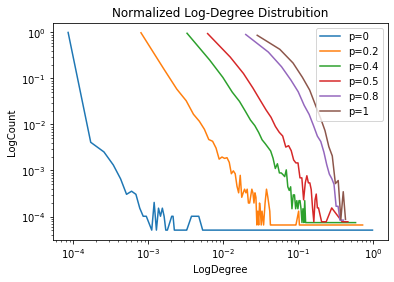

In [0]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import random
from sklearn import preprocessing
plt.figure()
for p in [0,0.2,0.4,0.5,0.8,1]:
  G = nx.Graph()
  G.add_edges_from([(0, 1), (1, 2), (2, 0)])

  while len(G.nodes.values())<= 20000:
    o = np.random.randint(len(G.nodes.values()), size=1)
    s = np.random.binomial(1, p, 1)
    #print(s)
    #print(list(G.neighbors(int(o))))
    ot = random.choice(list(G.neighbors(int(o))))
  #  print(ot)
  #  G.add_edge(*[len(G.nodes.values()),int(o)], weight=p)
  #  G.add_edge(*[len(G.nodes.values()),int(ot)], weight=1-p)
    if s == 1:
      G.add_edge(*[len(G.nodes.values()), int(o)])
    else:
      e =[len(G.nodes.values()), int(ot)]
      #print(type(e))
      #G.add_edge([ot, len(G.nodes.values())])
      G.add_edge(*e)
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence 
  # print "Degree sequence", degree_sequence
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  histo = pd.DataFrame([deg,cnt])
  histo = preprocessing.normalize(histo)
  #cnt = preprocessing.normalize(cnt)
  print(deg)
  print(cnt)
  #fig, ax = plt.subplots()
  #plt.bar(deg,cnt, color='b')
 # plt.hist(degree_sequence, density=True, bins='auto')
  #plt.figure()
  plt.loglog(histo[0],histo[1], label="p="+str(p))
  plt.title("Normalized Log-Degree Distrubition")
  plt.ylabel("LogCount")
  plt.xlabel("LogDegree")
  #ax.set_xticks([d + 0.4 for d in deg])
  #ax.set_xticklabels(deg)
  #plt.loglog(deg,cnt,'ro')
  #plt.show()
  #print(degree_sequence)
#plt.legend(bbox_to_anchor=(1., 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.savefig('LogNormalDegree2')
histo[1]

Plots in 11.2 a.) Log-log Plots sollten in Ordnung sein, obwohl ich diese noch nicht normalisiert habe.

(b) Not all of the degree distributions (different p’s) follow a power law distribution. Which
one(s) don’t, and if so, can you say anything about their degree distributions?



In [0]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import random
import powerlaw
from sklearn import preprocessing
plt.figure()
for p in [0,0.2,0.4,0.5,0.8,1]:
  G = nx.Graph()
  G.add_edges_from([(0, 1), (1, 2), (2, 0)])

  while len(G.nodes.values())<= 20000:
    o = np.random.randint(len(G.nodes.values()), size=1)
    s = np.random.binomial(1, p, 1)
    #print(s)
    #print(list(G.neighbors(int(o))))
    ot = random.choice(list(G.neighbors(int(o))))
  #  print(ot)
  #  G.add_edge(*[len(G.nodes.values()),int(o)], weight=p)
  #  G.add_edge(*[len(G.nodes.values()),int(ot)], weight=1-p)
    if s == 1:
      G.add_edge(*[len(G.nodes.values()), int(o)])
    else:
      e =[len(G.nodes.values()), int(ot)]
      #print(type(e))
      #G.add_edge([ot, len(G.nodes.values())])
      G.add_edge(*e)
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

  results = powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=False)
  print(results.power_law.alpha)
  print(results.power_law.xmin)
  R, p0 = results.distribution_compare('power_law', 'exponential')
  print(R, p0)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


5.132316515598639
1.0
12972.974102930555 1.0189144213165442e-07


Calculating best minimal value for power law fit


2.430945267591596
2.0
2169.2023824058733 2.461190762510176e-09


Calculating best minimal value for power law fit


2.846942746715026
4.0
341.157110797482 5.369108785189109e-07


Calculating best minimal value for power law fit


3.0286059660409608
4.0
112.109611567647 2.103353734340029e-06


Calculating best minimal value for power law fit


3.802501743258845
4.0
-12.597973507778379 0.32166948317376676


Calculating best minimal value for power law fit


8.413564911291978
9.0
0.3322787392311466 0.8204905971829067


<Figure size 432x288 with 0 Axes>

(c) Use a library (or function) for power-law fitting and compute the estimated xmin and α
parameters for the graph described in (a) for p = 0.2. What are the results? How good are the
results, as in: Can you derive any confidence values in or goodness-of-fit estimate of the
results (e.g. through some statistical test)? What results would you expect, and what factors
may contribute to any differences?

In [0]:
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])
p= 0.2
while len(G.nodes.values())<= 20000:
  o = np.random.randint(len(G.nodes.values()), size=1)
  s = np.random.binomial(1, p, 1)
  ot = random.choice(list(G.neighbors(int(o))))
  if s == 1:
    G.add_edge(*[len(G.nodes.values()), int(o)])
  else:
    e =[len(G.nodes.values()), int(ot)]
    G.add_edge(*e)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence 
  # print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(degreeCount)
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c
histo = pd.DataFrame([deg,cnt])
histo = preprocessing.normalize(histo)
#deg = (deg - np.min(deg))/(np.max(deg)-np.min(deg))
logdeg = np.log(histo[0])
logcnt = np.log(histo[1])
#print(histo[0])
#params, paramscov = curve_fit(func_powerlaw, logdeg, logcnt, maxfev=2000 )
#print(params)

#sol2 = curve_fit(func_powerlaw, deg, cnt, p0 = np.asarray([-1,10**5,0]))
#np.asarray(deg)
#plt.scatter(logdeg,logcnt)
#plt.plot(logdeg, func_powerlaw(logdeg, params[0], params[1], params[2]),
#         label='Fitted function')


Counter({1: 15139, 2: 2426, 3: 890, 4: 439, 5: 288, 6: 190, 7: 120, 8: 87, 9: 64, 10: 57, 13: 32, 11: 30, 12: 27, 14: 26, 15: 20, 18: 15, 16: 14, 17: 13, 19: 10, 20: 8, 23: 7, 37: 5, 24: 5, 21: 5, 38: 4, 33: 4, 32: 4, 31: 4, 28: 4, 26: 4, 25: 4, 70: 3, 46: 3, 39: 3, 36: 3, 30: 3, 57: 2, 54: 2, 42: 2, 41: 2, 22: 2, 1061: 1, 667: 1, 549: 1, 300: 1, 239: 1, 207: 1, 199: 1, 194: 1, 167: 1, 117: 1, 114: 1, 112: 1, 100: 1, 88: 1, 83: 1, 79: 1, 65: 1, 64: 1, 63: 1, 62: 1, 60: 1, 53: 1, 52: 1, 48: 1, 45: 1, 44: 1, 43: 1, 40: 1, 35: 1, 29: 1, 27: 1})


In [0]:
!pip install powerlaw

In [0]:

import powerlaw
#logdegreesequence = np.log(degree_sequence)
results = powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=False)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p0 = results.distribution_compare('power_law', 'exponential')
print(R, p0)
#plt.scatter(logdeg,logcnt)
#results.plot_ccdf(original_data=True)

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


2.4248027745919503
2.0
2132.729207046474 3.046904182261669e-08


/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


(d) Repeat the same for fitting to a scale-free model. Which model fits better to the data?



In [0]:
G = nx.scale_free_graph(20000)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence 
  # print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

def func_powerlaw(x, m, c, c0):
    return c0 + x**m * c
logdeg = np.log(deg)
logcnt = np.log(cnt)
params, paramscov = curve_fit(func_powerlaw, np.asarray(logdeg), np.asarray(logcnt), maxfev=2000 )


#sol2 = curve_fit(func_powerlaw, deg, cnt, p0 = np.asarray([-1,10**5,0]))
#np.asarray(deg)
#plt.scatter(deg,cnt)
import powerlaw
results = powerlaw.Fit(degree_sequence)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential')
print(R,p)
#plt.scatter(logdeg,logcnt)
#results.plot_ccdf(original_data=True)

2.443424341343981
6.0
1943.740480921673 4.6931429710992844e-05


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


1678.726427299476 0.0012466288881422586


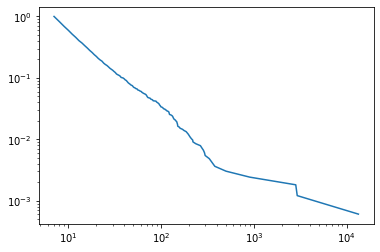

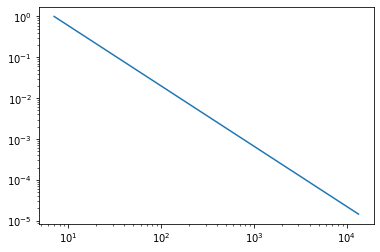

In [0]:
print(R,p)
results.plot_ccdf()
results.power_law.plot_ccdf()


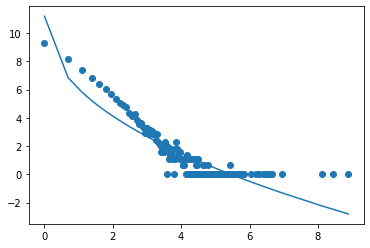

In [0]:
plt.scatter(logdeg,logcnt)
plt.plot(logdeg, func_powerlaw(logdeg, params[0], params[1], params[2]),
         label='Fitted function')

Generate (without using existing one-line library methods) an Erdos-Renyi random graph
with N = 2000 nodes, with probability p = 0.1 of an edge existing between any two nodes,
and plot the resulting normalized degree distribution. What type of distribution is the degree
distribution? Briefly explain why the distribution differs from the graphs generated in part
(a).

(243, 242, 241, 240, 237, 236, 235, 234, 233, 232, 231, 230, 229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 169, 168, 167, 166, 165, 164, 163, 161)
(1, 1, 2, 1, 1, 5, 2, 3, 4, 3, 5, 1, 7, 9, 8, 9, 7, 9, 10, 8, 24, 16, 19, 25, 30, 32, 33, 42, 34, 41, 46, 42, 51, 43, 45, 50, 50, 65, 61, 53, 57, 65, 45, 49, 62, 54, 47, 63, 68, 60, 50, 36, 49, 50, 37, 36, 33, 28, 28, 23, 22, 17, 14, 15, 19, 16, 11, 5, 10, 6, 5, 2, 6, 3, 4, 1, 3, 2, 1)


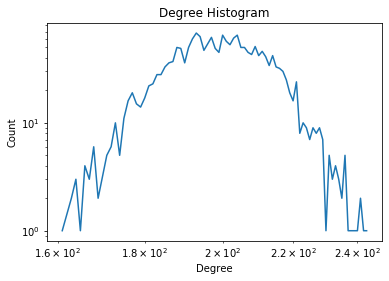

In [0]:

import matplotlib.pyplot as plt
from networkx import nx

n = 2000  # 10 nodes
m = 200  # 20 edges

G = nx.erdos_renyi_graph(n,0.1)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence 
  # print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.loglog(deg,cnt)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
print(deg)
print(cnt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


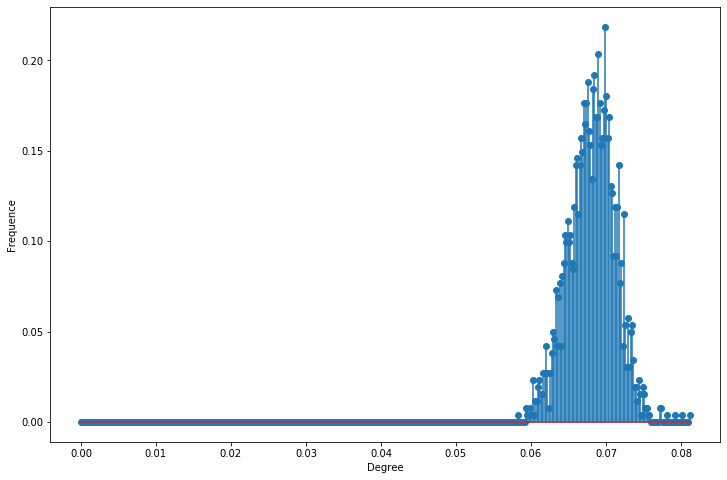

In [0]:
p = 0.1
N = 2000
G_Erdos_Renyi = nx.Graph()

for i in range(0,N-1,1):
  G_Erdos_Renyi.add_node(i)

for i in range(0,N-1,1):
  for j in range(0,N-1,1):
    if i != j and random.uniform(0, 1) < p:
      G_Erdos_Renyi.add_edge(i,j)
degree_freq_y = np.array(nx.degree_histogram(G_Erdos_Renyi)).astype('float')
x = range(0,len(degree_freq_y))

data = pd.DataFrame([x,degree_freq_y])

# # normalize data
data_normalize = preprocessing.normalize(data)

plt.figure(figsize=(12, 8))
plt.stem(data_normalize[0],data_normalize[1])
plt.ylabel("Frequence")
plt.xlabel("Degree")
#plt.show()
plt.savefig("Erdos")

11.3 Central Actors

In [0]:
G=nx.read_weighted_edgelist("/content/drive/My Drive/Colab Notebooks/week11_imdb_actor_edges.tsv",create_using=nx.DiGraph())
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 17577\nNumber of edges: 287074\nAverage in degree:  16.3324\nAverage out degree:  16.3324'

In [0]:
actor_key = pd.read_csv('/content/drive/My Drive/Colab Notebooks/week11_imdb_actors_key.tsv',encoding='unicode_escape',delimiter='\t',header=0)

ID  ...                                             genres
1  5026  ...  Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...

[1 rows x 5 columns]

In [0]:
print(G.size())
G.size(weight='weight')

287074


941949.0

In [0]:
largest_cc = max(nx.weakly_connected_components(G), key=len)
len(largest_cc)

17455

In [0]:
l = []
for node in G.nodes:
  if node not in largest_cc:
    l.append(node)

for node in l:
  G.remove_node(node)


In [0]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 17455\nNumber of edges: 286911\nAverage in degree:  16.4372\nAverage out degree:  16.4372'

Compute Degree Centrality

In [0]:
deg_central = nx.degree_centrality(G)

In [0]:
from operator import itemgetter 
from collections import OrderedDict 
res_deg = dict(sorted(deg_central.items(), key = itemgetter(1), reverse = True)[:20])
sort_deg = OrderedDict(sorted(res_deg.items(), key=lambda x: x[1]))
sort_deg

OrderedDict([('1804', 0.024521599633321876),
             ('1688', 0.025094534204193882),
             ('177', 0.02578205568924029),
             ('1778', 0.02583934914632749),
             ('701', 0.026183109888850694),
             ('163', 0.0265268706313739),
             ('131', 0.026985218288071502),
             ('2108', 0.026985218288071502),
             ('1626', 0.027214392116420308),
             ('127', 0.028073793972728314),
             ('160', 0.02824567434398992),
             ('175', 0.02864672854360032),
             ('176', 0.030537412627477944),
             ('179', 0.03122493411252435),
             ('164', 0.03179786868339636),
             ('407', 0.03214162942591956),
             ('1802', 0.03345937893892518),
             ('1754', 0.034318780795233185),
             ('1743', 0.03494900882319239),
             ('162', 0.0449180703563653)])

In [0]:
print(sorted(actor_key[actor_key['ID']==127]['genres']))
actor_key[actor_key['ID']==127]

['Adult:247,Adventure:1,Comedy:1,Documentary:2,Drama:1,NULL:53,Romance:1,Short:3']


ID  ...                                             genres
16429  127  ...  Adult:247,Adventure:1,Comedy:1,Documentary:2,D...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==1743]

ID  ...                                             genres
1761  1743  ...  Action:1,Adult:380,Adventure:1,Comedy:2,Docume...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==1754]

ID  ...                                             genres
13442  1754  ...  Action:1,Adult:389,Documentary:5,Drama:5,NULL:...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==1802]

ID  ...                                             genres
11272  1802  ...  Adult:343,Crime:1,Documentary:2,NULL:86,Short:...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==407]

ID  ...                                             genres
4092  407  ...  Adult:286,Adventure:1,Comedy:1,Documentary:2,D...

[1 rows x 5 columns]

Compute Betweeness Centrality

In [0]:
between_central = nx.betweenness_centrality(G)

In [0]:
res_bet = dict(sorted(between_central.items(), key = itemgetter(1), reverse = True)[:20])
sort_bet = OrderedDict(sorted(res_bet.items(), key=lambda x: x[1]))
sort_bet

OrderedDict([('659', 0.0021623981747345496),
             ('7253', 0.0022215075276819894),
             ('4030', 0.00224141106556124),
             ('6233', 0.0022423025869450814),
             ('2290', 0.00226255348687891),
             ('4627', 0.002268650060079927),
             ('285', 0.0022785683541646238),
             ('2623', 0.002320850358557602),
             ('574', 0.0023571560128562404),
             ('3476', 0.002529124603809553),
             ('8447', 0.002608735130990375),
             ('5256', 0.0026242992888823547),
             ('168', 0.0029718664984702014),
             ('503', 0.003109415394157382),
             ('3268', 0.0033156192717615903),
             ('3235', 0.0034832941598424705),
             ('235', 0.003508774088946199),
             ('551', 0.0036449547812421523),
             ('3213', 0.004877860985296886),
             ('564', 0.005165960545406737)])

In [0]:
actor_key[actor_key['ID']==564]

ID  ...                                             genres
2563  564  ...  Adventure:1,Comedy:2,Documentary:5,Drama:6,Fam...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==3213]

ID  ...                                             genres
9655  3213  ...  Adventure:3,Animation:1,Comedy:16,Documentary:...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==551]

ID  ...                                             genres
9851  551  ...  Action:3,Adult:1,Adventure:2,Animation:1,Comed...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==235]

ID  ...                                             genres
16453  235  ...  Comedy:7,Documentary:14,Drama:9,Family:1,Music...

[1 rows x 5 columns]

In [0]:
actor_key[actor_key['ID']==3235]

ID  ...                                             genres
10169  3235  ...  Adventure:1,Crime:4,Documentary:27,Drama:5,Fam...

[1 rows x 5 columns]

Compute Closeness Centrality

In [0]:
close_central = nx.closeness_centrality(G)

In [0]:
res_clo = dict(sorted(close_central.items(), key = itemgetter(1), reverse = True)[:20])
sort_clo = OrderedDict(sorted(res_clo.items(), key=lambda x: x[1]))
sort_clo

OrderedDict([('3306', 0.1625318570423574),
             ('10398', 0.16262463822208018),
             ('3294', 0.16312201811123608),
             ('644', 0.16319145821710457),
             ('1448', 0.16377488010400446),
             ('3295', 0.1637758478517575),
             ('3317', 0.1645946672508138),
             ('3142', 0.1657746436577075),
             ('6131', 0.1683063971791102),
             ('6900', 0.1706697131144713),
             ('692', 0.17191928237864068),
             ('728', 0.1734844635117848),
             ('3186', 0.1763557220596281),
             ('3884', 0.17768336831583717),
             ('441', 0.17863172052245246),
             ('7277', 0.17927467868291688),
             ('3361', 0.18140029390610077),
             ('3930', 0.18741832643975603),
             ('701', 0.19023561733757288),
             ('2896', 0.19430467520827086)])

In [0]:
print(sorted(actor_key[actor_key['ID']==2896]['genres']))
actor_key[actor_key['ID']==2896]

['Action:3,Adult:1,Adventure:1,Comedy:3,Crime:1,Documentary:38,Drama:11,Family:3,Horror:1,Music:12,Mystery:1,NULL:7,Romance:1,Sci-Fi:3,Short:9,Thriller:11']


ID  ...                                             genres
16754  2896  ...  Action:3,Adult:1,Adventure:1,Comedy:3,Crime:1,...

[1 rows x 5 columns]

In [0]:
print(sorted(actor_key[actor_key['ID']==701]['genres']))
actor_key[actor_key['ID']==701]

['Animation:3,Comedy:5,Documentary:32,Drama:6,Family:6,Fantasy:1,Music:5,Mystery:1,NULL:2,Romance:2,Short:9,Thriller:2,War:1']


ID  ...                                             genres
4524  701  ...  Animation:3,Comedy:5,Documentary:32,Drama:6,Fa...

[1 rows x 5 columns]

In [0]:
print(sorted(actor_key[actor_key['ID']==3930]['genres']))
actor_key[actor_key['ID']==3930]

['Animation:1,Comedy:6,Documentary:23,Drama:5,Family:4,Music:2,Mystery:1,NULL:2,Romance:1,Short:3,Thriller:6,War:2']


ID  ...                                             genres
6322  3930  ...  Animation:1,Comedy:6,Documentary:23,Drama:5,Fa...

[1 rows x 5 columns]

In [0]:
print(sorted(actor_key[actor_key['ID']==3361]['genres']))
actor_key[actor_key['ID']==3361]

['Action:6,Adult:2,Adventure:2,Comedy:2,Crime:3,Documentary:16,Drama:8,Family:2,Music:4,Musical:1,Mystery:1,NULL:9,Sci-Fi:1,Short:1,Thriller:5']


ID   name  ...  main_genre                                             genres
2377  3361  Ice-T  ...       Drama  Action:6,Adult:2,Adventure:2,Comedy:2,Crime:3,...

[1 rows x 5 columns]

In [0]:
print(sorted(actor_key[actor_key['ID']==7277]['genres']))
actor_key[actor_key['ID']==7277]

['Comedy:4,Documentary:24,Drama:1,Family:2,Mystery:1,NULL:2,Short:2']


ID  ...                                             genres
757  7277  ...  Comedy:4,Documentary:24,Drama:1,Family:2,Myste...

[1 rows x 5 columns]

In [0]:
print(sorted(actor_key[actor_key['ID']==441]['genres']))
actor_key[actor_key['ID']==441]

['Adult:2,Adventure:4,Comedy:12,Crime:2,Drama:14,Family:1,Fantasy:1,Mystery:1,NULL:1,Romance:6,Sci-Fi:3,Short:11,Thriller:7,War:2']


ID  ...                                             genres
17528  441  ...  Adult:2,Adventure:4,Comedy:12,Crime:2,Drama:14...

[1 rows x 5 columns]